<a href="https://colab.research.google.com/github/AlejandroNunezArroyo/ARTIFICIAL-VISION/blob/main/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Point Processing

In the previous tutorial, you learnt the basics of image manipulation and colour isolation. Today, you will learn how to implement point processing methods to enhance images for the following tasks: e.g. segmentation, recognition. 

Point processing helps us manipulate every pixel of an image by applying a transformation. This is defined by $g(x, y) = T [f(x, y)]$ where $g(x, y)$ is the output image. 

Take into account that our lecture is short so we will only process grey-scale images. However, to research and to implement the same methods to colour images is up to you and highly encouraged. 

## Negative Transformation
The first transformation inverts the identity transformation to get the negative of a picture. To do so, each pixel of the input image is subtracted from the $L-1$ and mapped onto the output image. $L = 2^k$ where $k$ = number of bits to represent a pixel. 

As explained in class, if the pixels of an image will save only 6 gray levels, we will only need 3 bits because we can save up to 7 gray levels (111 in binary), otherwise, we would need to consider 4 or more bits. Normally, we save up to 256 gray values per pixel: $L = 2^8; 8 bits$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
from google.colab import files, drive
import zipfile

%matplotlib inline


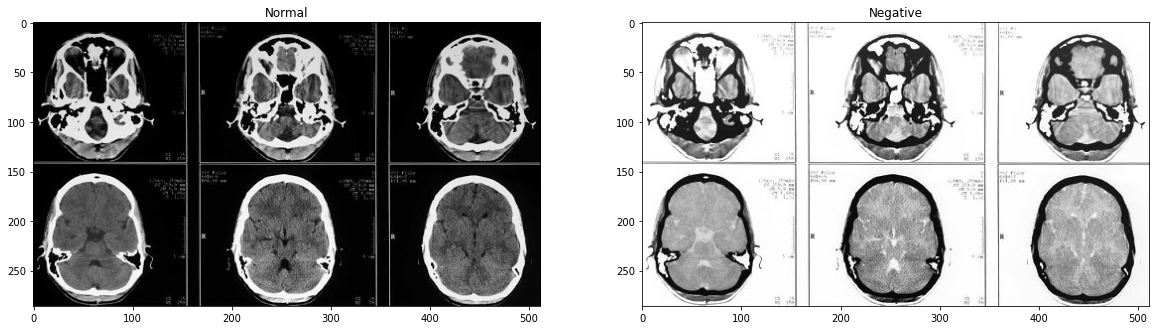

In [ ]:
# read and convert the image to grayscale
image = cv2.imread("ct.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# bitwise lets us perform and, or, not operations. bitwise_not will negate the values. 
image_negative = cv2.bitwise_not(image)

# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title('Negative')
ax2.imshow(image_negative, cmap='gray')

## Exponential or Power Law Transformation

This transformation can help make corrections to the intensity levels of an image. For example, if the picture was taken in a very sunny or dark day. 

The transformation is defined by the following formula: $T(f)= (f(x,y)+esp)^γ$ where $esp$ and $γ$ are defined by us. 





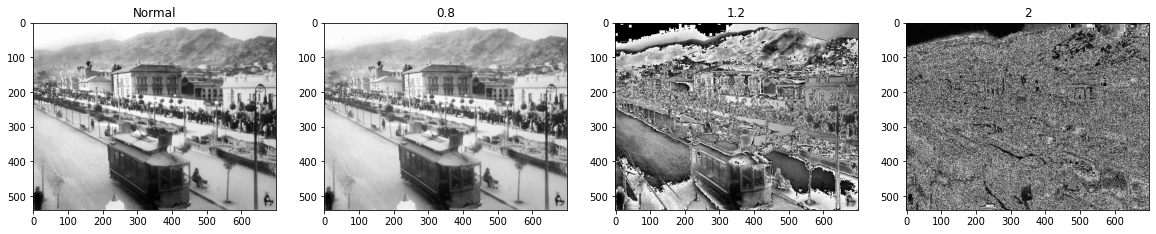

In [ ]:
# read and convert the image to grayscale
image = cv2.imread("lapaz.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gammas = [0.8, 1.2, 2]

gamma_corrected = []

for gamma in gammas: 
      
    # apply gamma correction. 
    gamma_corrected.append(np.array((image+1) ** gamma, dtype = 'uint8'))
  

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title(gammas[0])
ax2.imshow(gamma_corrected[0], cmap='gray')
ax3.set_title(gammas[1])
ax3.imshow(gamma_corrected[1], cmap='gray')
ax4.set_title(gammas[2])
ax4.imshow(gamma_corrected[2], cmap='gray')

## Histogram equalization

This transformation lets us balance the contrast of an image; hopefully giving a more uniform dataset.

Histogram equalisation is a way to distribute the pixel intensities within an image in a more uniform manner. The image's cumulative frequency plot can be used as to transform the intensities in the image in order to achieve this. 

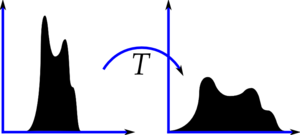

There are two principal methods when it comes about applying histogram equalizaiton: one using a direct OpenCV function and another processing every step individually. It's important to see both. 

### equalizeHist() function

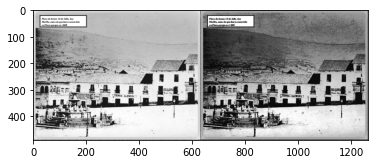

In [ ]:
# Read an image in grayscale
img = cv2.imread('murillo_square.jpg',0)

# Gets an equalized image
equ = cv2.equalizeHist(img)

# Stacks images side-by-side
res = np.hstack((img,equ)) 

plt.imshow(res,cmap="gray")

### Sequential equalization

Calculate the gray level frequency histogram 

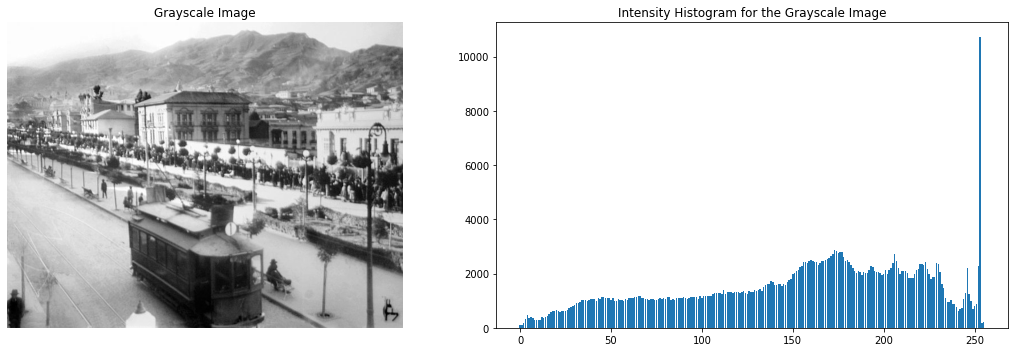

In [ ]:
# load the image
img = cv2.imread("lapaz.jpg",0)

# generate the intensity histogram for the image
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# plot the grayscale image and the histogram
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_axis_off()
ax1.set_title("Grayscale Image")
ax1.imshow(img, cmap="gray")

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Intensity Histogram for the Grayscale Image")
ax2.bar(range(0, 256), hist.reshape(-1))
fig.tight_layout()
plt.show()

The cumulative frequency array of an image is calculated using the numpy function cumsum, which has parameters:

* a - an input array, here is it the histogram values that have been divided by the number of pixels in the image being used.
* axis - the axis here is not specified so the cumsum is calculated over the flattened array.

By dividing each element in this array by the number of pixels in the image the cumulative probabiliy graph can be plotted that has the pixel intensity range as the x-axis values and 0 to 1 as the y-axis values.

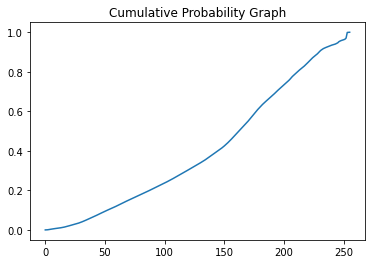

In [ ]:
# calculate the cumulative probability of the grayscale image
n_pixels = img.shape[0] * img.shape[1]
cf = np.cumsum(hist/n_pixels)

plt.title("Cumulative Probability Graph")
plt.plot(cf)


To have equal contrast in an image, the cumulative probability plot should look like a straight diagonal line through the origin. To achieve this the cumulative probability at each pixel value in the image is multiplied by the maximum intensity value of the new image (here it will be 256 as we are working with grayscale still) and this then becomes the new intensity value for the pixel:

$$ cp_i * 256 = pi_i $$

Where $ cp_i $ is the cumulative probability at pixel $ i $ and $ pi_i $ is the new, transformed intensity at pixel $ i $.

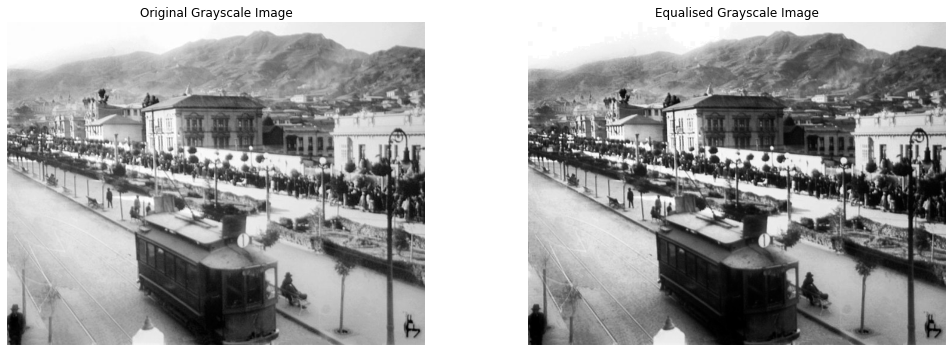

In [ ]:
alt_img = cv2.imread("lapaz.jpg", 0)

# for each pixel the intensity becomes the cumulative probability of 
# that intensity multiplied by the maximum intensity
for row in range(img.shape[0]):
  for col in range(img.shape[1]):
    alt_img[row, col] = cf[img[row, col]] * 256
            
# Next, we should round everything and put is as int
alt_img = np.round(alt_img).astype("uint8")
        
# generate the intensity histogram for the altered image
eq_hist = cv2.calcHist([alt_img],[0],None,[256],[0,256])

# plot picture and the cumulative probability graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_axis_off()
ax1.set_title("Original Grayscale Image")
ax1.imshow(img, cmap='gray')

ax2 = plt.subplot(1, 2, 2)
ax2.set_axis_off()
ax2.set_title("Equalised Grayscale Image")
ax2.imshow(alt_img, cmap='gray')

fig.tight_layout()
plt.show()

## Exercise 1

1. Implement the negative transformation using mathematical operations and numpy arrays. 

Original code

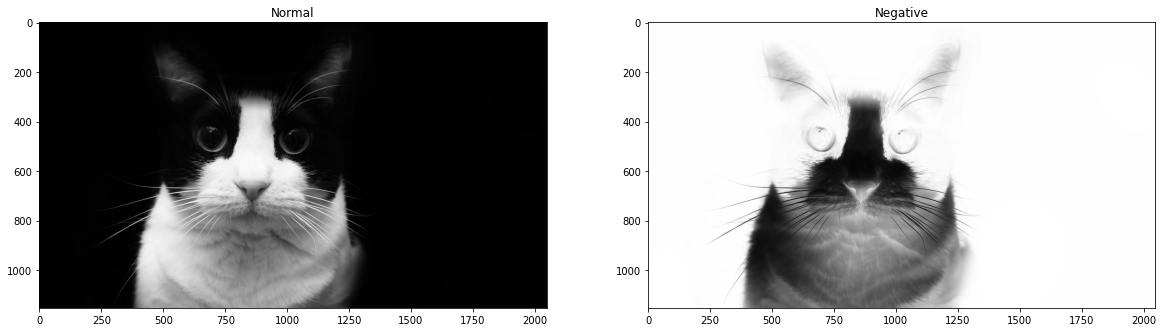

In [ ]:
import cv2
import matplotlib.pyplot as plt
# read and convert the image to grayscale
image = cv2.imread("gato.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# bitwise lets us perform and, or, not operations. bitwise_not will negate the values. 
image_negative = cv2.bitwise_not(image)

# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title('Negative')
ax2.imshow(image_negative, cmap='gray')

Implementation

Operation to invert the colour

In [ ]:
data_new = 255 - image
print(data_new)

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]]


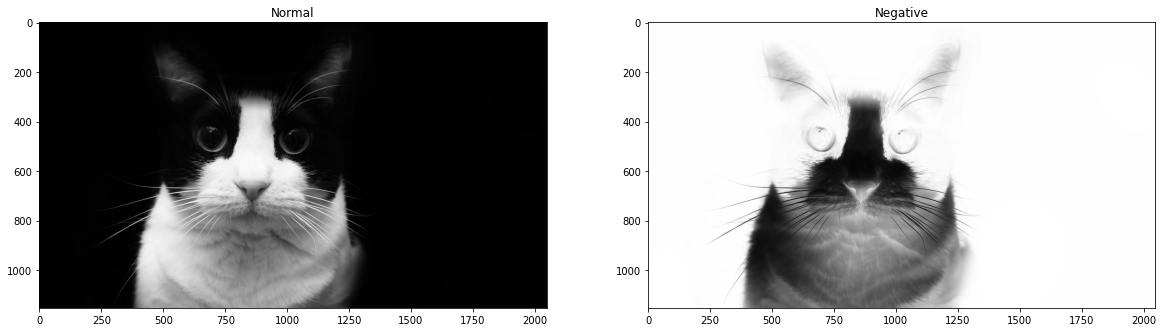

In [ ]:
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title('Negative')
ax2.imshow(data_new, cmap='gray')

2. Select one of the noisy images from the following url: https://drive.google.com/drive/folders/12cbG23XbzMBvot5UyML8l1z61GLHm53T?usp=sharing 
Then, implement one or multiple methods explained above in order to enhance the image. You are also free to implement any of the methods you researched for this class. 
Remember that we are mainly working with grayscale images. 

To enhance the image It will be used "equalizeHist() function"

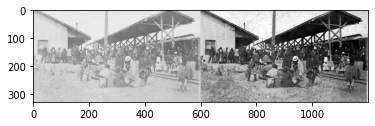

In [ ]:
import numpy as np
# Read an image in grayscale
img = cv2.imread('bolivia.jpg',0)

# Gets an equalized image
equ = cv2.equalizeHist(img)

# Stacks images side-by-side
res = np.hstack((img,equ)) 

plt.imshow(res,cmap="gray")